# DIY Covid-19 Dashboard - Silvia

Here is a dashboard showing statistics relating to Covid-19.

The data originates from Public Health England (PHE).

- First graph


This first analysis looks at the number of cases by speciment date, hospital admissions, new deaths and new tests by published date. 

The following DataFrame shows the values ordered by date.

In [255]:
# import pandas as pd
import matplotlib.pyplot as plt
import json

# an iPython  "magic" that enables the embedding of matplotlib output
%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 130

In [256]:
#reading the json file 

with open("admission.json", "rt") as INFILE:
    data=json.load(INFILE)
    
datalist=data['data']
#datalist

In [257]:
#sort the dates 

dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()


#turing the dates into panda date type

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
#print (startdate, ' to ', enddate)       #prints the start and end date


#define the DataFrame, create an index, define the title of the columns
index=pd.date_range(startdate, enddate, freq='D')
admissionsdf=pd.DataFrame(index=index, columns=['cases', 'admissions', 'deaths', 'tests'])



#enter values into the emptey DataFrame 
for entry in datalist: 
    date=parse_date(entry['date'])
    for column in ['cases', 'admissions', 'deaths', 'tests']:
        if pd.isna(admissionsdf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            admissionsdf.loc[date, column]=value
            
admissionsdf

,cases,admissions,deaths,tests
2020-01-30,2,0,0,0
2020-01-31,0,0,0,0
2020-02-01,0,0,0,0
2020-02-02,0,0,0,0
2020-02-03,0,0,0,0
...,...,...,...,...
2020-10-16,14269,632,126,262139
2020-10-17,11856,785,157,239949
2020-10-18,10935,870,109,247423
2020-10-19,15037,861,118,203636


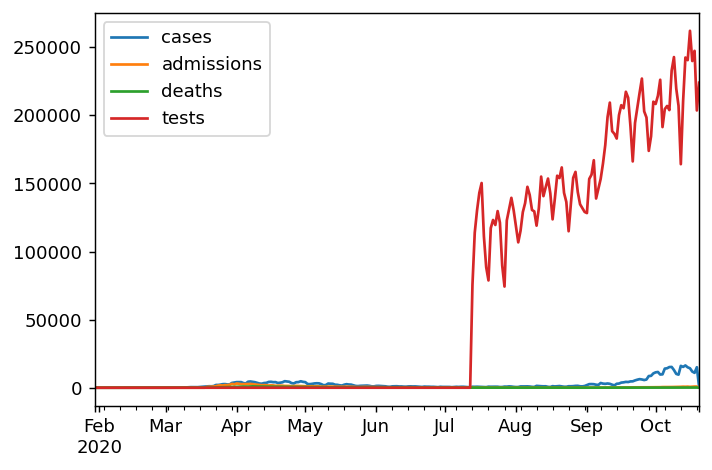

In [258]:

admissionsdf.plot()


#pillar3 and 1 has...ugly data 
#pillar 2 started in mid july 
#4 has no data

- Plotting the graph in log scale.

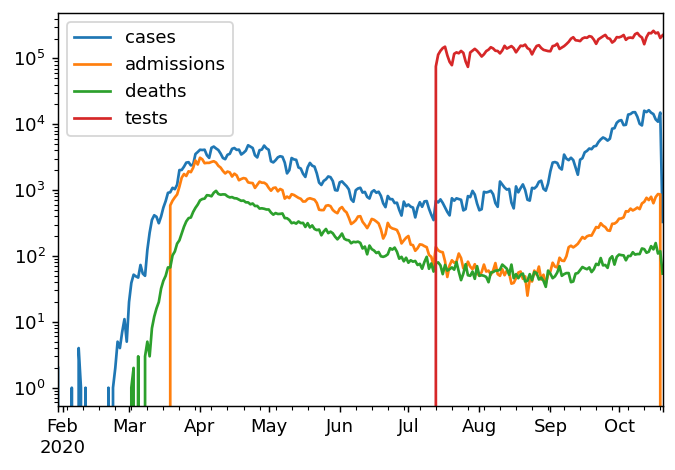

In [259]:
admissionsdf.plot(logy=True)

In [260]:
admissionsdf.to_pickle("admissionsdf.pkl")



import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 130


# our API access function. This will be called by the button when it is clicked
def access_api(button):
    print("I'm downloading data from the API...")
    print("...all done.")
    
# see the doc for the parameters    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download'
)

# register the callback function with the button
apibutton.on_click(access_api)
display(apibutton)

admissionsdf=pd.read_pickle("admissionsdf.pkl")

series=wdg.SelectMultiple(
    options=['cases', 'admissions', 'deaths', 'tests'],
    value=['cases', 'admissions', 'deaths', 'tests'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def admissions_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        admissionsdf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); capture output in variable graph   
graph=wdg.interactive_output(admissions_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

Output()

I'm downloading data from the API...
...all done.


- Second graph


This second analysis looks at the number cases by speciment date, new hospital admissions and the occipancy of beds with a ventilaros.  

In [261]:
with open("occupancy.json", "rt") as INFILE:
    data=json.load(INFILE)

    
datalist=data['data']
#datalist

In [262]:
dates=[dictionary['date'] for dictionary in datalist ]
dates.sort()

def parse_date(datestring):
    """ Convert a date string into a pandas datetime object """
    return pd.to_datetime(datestring, format="%Y-%m-%d")

startdate=parse_date(dates[0])
enddate=parse_date(dates[-1])
#print (startdate, ' to ', enddate)

index=pd.date_range(startdate, enddate, freq='D')
occupancydf=pd.DataFrame(index=index, columns=['cases', 'admissions', 'bedoccupancy'])
#occupancydf


Here is a DataFrame showing the values used. 

In [263]:

for entry in datalist:
    date=parse_date(entry['date'])
    for column in ['cases', 'admissions', 'bedoccupancy']:
        if pd.isna(occupancydf.loc[date, column]): 
            value= float(entry[column]) if entry[column]!=None else 0.0
            occupancydf.loc[date, column]=value
            
occupancydf.fillna(0.0, inplace=True)
occupancydf

#bedoccupancy with ventilators!

,cases,admissions,bedoccupancy
2020-01-30,2.0,0.0,0.0
2020-01-31,0.0,0.0,0.0
2020-02-01,0.0,0.0,0.0
2020-02-02,0.0,0.0,0.0
2020-02-03,0.0,0.0,0.0
...,...,...,...
2020-10-17,11856.0,785.0,494.0
2020-10-18,10935.0,870.0,503.0
2020-10-19,15037.0,861.0,528.0
2020-10-20,329.0,0.0,559.0


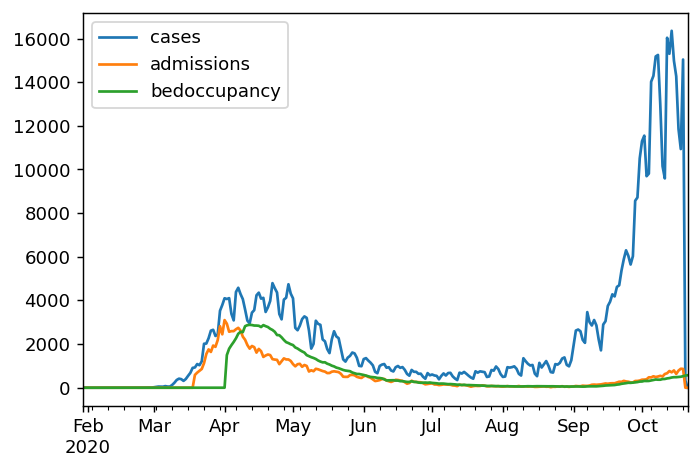

In [264]:
occupancydf.plot()

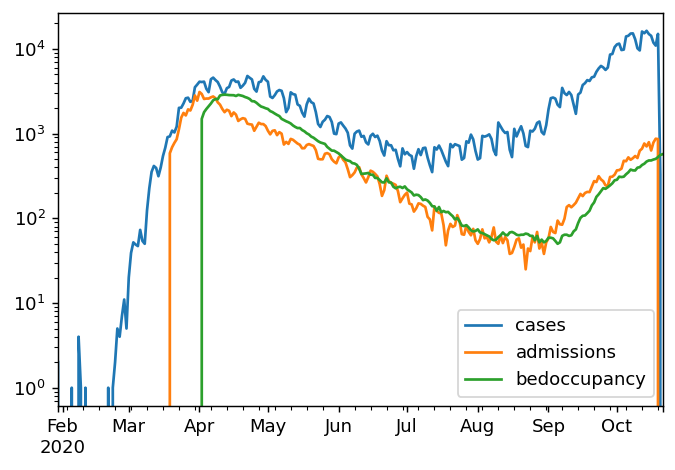

In [265]:
occupancydf.plot(logy=True)

In [266]:
occupancydf.to_pickle("occupancydf.pkl")

In [250]:
import ipywidgets as wdg
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
# make figures larger
plt.rcParams['figure.dpi'] = 130

In [251]:
#updating the data?? 

# our API access function. This will be called by the button when it is clicked
def access_api(button):
    print("I'm downloading data from the API...")
    print("...all done.")
    
# see the doc for the parameters    
apibutton=wdg.Button(
    description='Refresh data',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click to download current Public Health England data',
    icon='download'
)

# register the callback function with the button
apibutton.on_click(access_api)
display(apibutton)

Button(description='Refresh data', icon='download', style=ButtonStyle(), tooltip='Click to download current Pu…

In [252]:
occupancydf=pd.read_pickle("occupancydf.pkl")

series=wdg.SelectMultiple(
    options=['cases', 'admissions', 'bedoccupancy'],
    value=['cases', 'admissions', 'bedoccupancy'],
    rows=3,
    description='Stats:',
    disabled=False
)

scale=wdg.RadioButtons(
    options=['linear', 'log'],
#    value='pineapple', # Defaults to 'pineapple'
#    layout={'width': 'max-content'}, # If the items' names are long
    description='Scale:',
    disabled=False
)

# try replacing HBox with a VBox
controls=wdg.HBox([series, scale])

def occupancy_graph(gcols, gscale):
    if gscale=='linear':
        logscale=False
    else:
        logscale=True
    ncols=len(gcols)
    if ncols>0:
        occupancydf[list(gcols)].plot(logy=logscale)
    else:
        print("Click to select data for graph")
        print("(CTRL-Click to select more than one category)")

# keep calling timeseries_graph(gcols=value_of_series, gscale=value_of_scale); capture output in variable graph   
graph=wdg.interactive_output(occupancy_graph, {'gcols': series, 'gscale': scale})

display(controls, graph)

Output()

- THIRD graph - still working on it

In [267]:
 with open("barChart.json", "rt") as INFILE:
    data=json.load(INFILE)


datadic=data['data'] 
datadic

datadic=data['data'][0] 
#print(datadic)

